# Homework 1

## Part 1: Mortality Prediction in the ICU

The dataset you will use for this homework assignment can be found at the following link: https://drive.google.com/drive/folders/1n-fmx1jS_IWEsUj3EzlZ1qZ0hxqtSnZF?usp=sharing

Please make sure to copy the files to your own google drive folder and substitute the path to that file below to load the dataset.

In [160]:
# from google.colab import drive

# Will ask for authentication, click allow
# drive.mount("/content/drive")

# Enter the correct path here
#------YOUR CODE HERE--------
path_to_data_folder = "hst_953_2022_data"
#------YOUR CODE ENDS--------


In [161]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the GOSSIS dataset into a pandas dataframe
df = pd.read_csv(os.path.join(path_to_data_folder, "gossis.csv"))
print(df.shape)

(91713, 198)


In [162]:
len(list(df.columns)) # we have 198 features

198

(a)

In [163]:
# df_features_all = pd.read_csv(os.path.join(path_to_data_folder, "features_selected.csv"), encoding='latin1')
# features = df_features_all['Feature name'].to_numpy()
# features = [s.strip('\' ,') for s in features]
# print(features[:5])
# df_features_all['Feature name'] = features

df_features_all = pd.read_csv(os.path.join(path_to_data_folder, "features_selected_clean.csv"))
df_features_all


,Feature name,Useful,Irrelevant,Leaking,Comment/Justification
0,encounter_id,NaN,1.0,NaN,Classifier - Primary Classifier for record
1,patient_id,NaN,1.0,NaN,Classifier - can have multiple ICU admissions
2,hospital_id,NaN,1.0,NaN,Classifier - wouldn't use it as covariate beca...
3,hospital_death,NaN,1.0,NaN,Outcome
4,age,1.0,NaN,NaN,Pre-existing condition/variable
...,...,...,...,...,...
193,leukemia,1.0,NaN,NaN,Pre-existing condition
194,lymphoma,1.0,NaN,NaN,Pre-existing condition
195,solid_tumor_with_metastasis,1.0,NaN,NaN,Pre-existing condition
196,apache_3j_bodysystem,1.0,NaN,NaN,OH - Your choice. May be included in the model...


In [164]:
#------YOUR CODE HERE--------
# Enter the features corresponding to each category as a list below
# category (a)
# relevant features, all the features other than the ones listed below
relevant_features = list(df_features_all[df_features_all['Useful'] == 1.0]['Feature name'].to_numpy())
# category (b)
irrelevant_features = list(df_features_all[df_features_all['Irrelevant'] == 1.0]['Feature name'].to_numpy())
# category (c)
potentially_leaky_features = list(df_features_all[df_features_all['Leaking'] == 1.0]['Feature name'].to_numpy())
assert len(relevant_features) + len(irrelevant_features) + len(potentially_leaky_features) == df_features_all.shape[0]
#------YOUR CODE ENDS--------

# Features to drop: categories (b) and (c)
features_to_drop = irrelevant_features + potentially_leaky_features

# Ground truth labels
label = "hospital_death"

(b)

In [165]:
# Define the dataset and the target variable
X = df.drop(columns=features_to_drop+[label])
y = df[[label]]

In [166]:
df_relevant = df[relevant_features]
df_relevant

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,Caucasian,M,177.8,Acute Care/Floor,Floor,admit,Cardiac ICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,56.0,47.179671,0,Caucasian,F,183.0,Emergency Department,Floor,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,48.0,27.236914,0,Caucasian,M,170.2,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,NaN,23.297481,0,Caucasian,F,154.9,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [167]:
remaining_binary_features = []

for col in df_relevant.columns:
    # drop nan values in the array
    arr_uni = df_relevant[col].dropna(0).unique()
    n_outcome = arr_uni.shape[0]

    if n_outcome == 2: 
        print('Binary!', arr_uni)
        remaining_binary_features.append(col)
remaining_binary_features    

/var/folders/53/dfp4pcm53wb21f6mj9z7rtk80000gn/T/ipykernel_6050/4262034702.py:5: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  arr_uni = df_relevant[col].dropna(0).unique()


Binary! [0 1]
Binary! ['M' 'F']
Binary! [0 1]
Binary! [0. 1.]
Binary! [0. 1.]
Binary! [0. 1.]
Binary! [0. 1.]
Binary! [0. 1.]
Binary! [0. 1.]
Binary! [1. 0.]
Binary! [0. 1.]
Binary! [0. 1.]
Binary! [0. 1.]
Binary! [0. 1.]
Binary! [0. 1.]


['elective_surgery',
 'gender',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [168]:
# Define the dataset and the target variable
X = df.drop(columns=features_to_drop+[label])
y = df[[label]]
# Populate the following list with the names of the binary features
# that you didn't drop from the dataset
#------YOUR CODE HERE--------
#remaining_binary_features = ["feature1", "feature2", "feature3"]

# cast gender into 1 and 0
gender_series = X['gender'].replace('M',1)
gender_series = gender_series.replace('F',0)
X['gender'] = gender_series


#------YOUR CODE ENDS--------

# Convert binary features into strings
# (to apply a specific preprocessing pipeline to those features later)
for c in remaining_binary_features:
    X[c] = X[c].fillna(-1)
    X[c] = X[c].astype(int)
    X[c] = X[c].astype(str)
    X[c] = X[c].replace("-1", np.nan)

In [169]:
X['ethnicity'].unique()

array(['Caucasian', nan, 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [170]:
# Preprocessing pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#------YOUR CODE HERE--------
# Each of the below transformers should be either a preprocessing step
# (i.e. a scaler/encoder/imputer) or a pipeline (chain) of preprocessing
# steps

# For numerical features
numeric_transformer = Pipeline([('std', StandardScaler()),('impute',SimpleImputer(strategy='mean'))])

# For categorical features
categorical_transformer = OneHotEncoder()
#------YOUR CODE ENDS--------

preprocessing = ColumnTransformer(
    transformers=[
        (
            "num",
            numeric_transformer,
            selector(dtype_exclude=["category", object, "string"]),
        ),
        (
            "cat",
            categorical_transformer,
            selector(dtype_include=["category", object, "string"]),
        ),
    ]
)

preprocessing_pipeline = Pipeline(
    steps=[("preprocessing", preprocessing)]
)

In [171]:
# Split the dataset into an 80%/20% train-test split
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [172]:
# Train the preprocessing pipeline on the train set and apply it on the test set
X_train = preprocessing_pipeline.fit_transform(X_train_raw)  # fit on train set
# extract new feature names
feature_names = list(preprocessing_pipeline[0].transformers_[0][2]) + list(preprocessing_pipeline[0].transformers_[1][1].get_feature_names())
X_train = pd.DataFrame(X_train, columns=feature_names)  # to dataframe type
# apply preprocessing pipeline to test set
X_test = pd.DataFrame(preprocessing_pipeline.transform(X_test_raw), columns=feature_names)

/Users/mma0706/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(c)

In [173]:
from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
#------YOUR CODE HERE--------
clf_log = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
#------YOUR CODE ENDS--------

/Users/mma0706/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from collections import defaultdict

from torchmetrics import F1Score

#------YOUR CODE HERE--------
# Fill out the following function to compute and return the different
# performance metrics of the input model. This is to avoid copying
# the same code to compute the metrics for each model
def evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, sample_weight=None, printout = False):
    # test set
    y_pred = model.predict(X_test) 
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    stats_test = [acc, precision, recall, f1, roc]
    if printout:
        print(f'Test: \nAccuracy: {acc}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}\nAUC: {roc}\n')
    

    # training set
    y_pred = model.predict(X_train) 
    acc = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc = roc_auc_score(y_train, y_pred)

    stats_train = [acc, precision, recall, f1, roc]
    if printout:
        print(f'Train: \nAccuracy: {acc}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}\nAUC: {roc}\n')
    

    df_metrics = pd.DataFrame(data= {'Train': stats_train, 'Test': stats_test},  
                        index=['Accuracy', 'Precision', 'Recall', 'F1-score','AUC score'])
    return df_metrics

#------YOUR CODE ENDS--------

In [197]:
# Use evaluate_model to compute the different performance metrics for your linear regression model
#------YOUR CODE HERE--------
eval_log = evaluate_model(clf_log)
eval_log
#------YOUR CODE ENDS--------

,Train,Test
Accuracy,0.927981,0.926348
Precision,0.691771,0.674556
Recall,0.297566,0.287335
F1-score,0.416133,0.403005
AUC score,0.642526,0.637102


(d)

In [188]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit a random forest
# Use random_state=42 for consistency
#------YOUR CODE HERE--------
clf_RF = RandomForestClassifier(max_depth=None, random_state=42).fit(X_train, y_train)
#------YOUR CODE ENDS--------

/var/folders/53/dfp4pcm53wb21f6mj9z7rtk80000gn/T/ipykernel_6050/3334003845.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(max_depth=None, random_state=42).fit(X_train, y_train)


In [196]:
# Use evaluate_model to compute the different performance metrics for your random forest
#------YOUR CODE HERE--------
eval_rf = evaluate_model(clf_RF)
eval_rf
#------YOUR CODE ENDS--------

,Train,Test
Accuracy,1.0,0.929128
Precision,1.0,0.783037
Recall,1.0,0.250158
F1-score,1.0,0.379179
AUC score,1.0,0.621796


In [178]:
import xgboost
# Create and fit an xgboost model
# Use random_state=42 for consistency
#------YOUR CODE HERE--------
# define the model
xgbRF = xgboost.XGBRFClassifier(n_estimators=100, subsample=0.9).fit(X_train, y_train)
#------YOUR CODE ENDS--------


In [199]:
# Use evaluate_model to compute the different performance metrics for your xgboost model
#------YOUR CODE HERE--------
eval_xgb = evaluate_model(xgbRF)
eval_xgb
#------YOUR CODE ENDS--------

,Train,Test
Accuracy,0.929685,0.926075
Precision,0.843621,0.760722
Recall,0.226770,0.212350
F1-score,0.357454,0.332020
AUC score,0.611401,0.603012


(e)

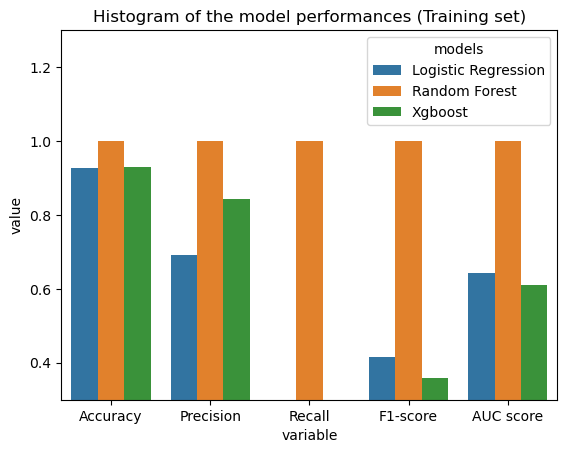

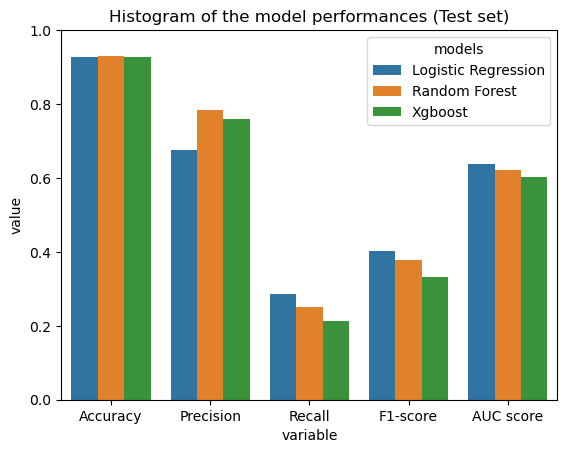

In [203]:
# Plot the performance metrics on a histogram
# You may use any python library of your choice
#------YOUR CODE HERE--------
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0.3, 1.3)
models = ["Logistic Regression", "Random Forest", "Xgboost"]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
train_hist = pd.concat([eval_log['Train'], eval_rf['Train'], eval_xgb['Train']],axis=1)
a=[e for model in zip(*[models]*5) for e in model]
d = train_hist.melt()
d['models'] = a
d['variable'] = metrics *3
plt.title("Histogram of the model performances (Training set)")
sns.barplot(y='value',x='variable',hue='models',data=d)
plt.show()


plt.ylim(0.0, 1.0)
models = ["Logistic Regression", "Random Forest", "Xgboost"]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
train_hist = pd.concat([eval_log['Test'], eval_rf['Test'], eval_xgb['Test']],axis=1)
models_rep =[e for model in zip(*[models]*5) for e in model]
d = train_hist.melt()
d['models'] = models_rep
d['variable'] = metrics *3
plt.title("Histogram of the model performances (Test set)")
sns.barplot(y='value',x='variable',hue='models',data=d)
plt.show()
#------YOUR CODE ENDS--------

(f) (answer this in your report)

(g)

In [1]:
#! pip install shap

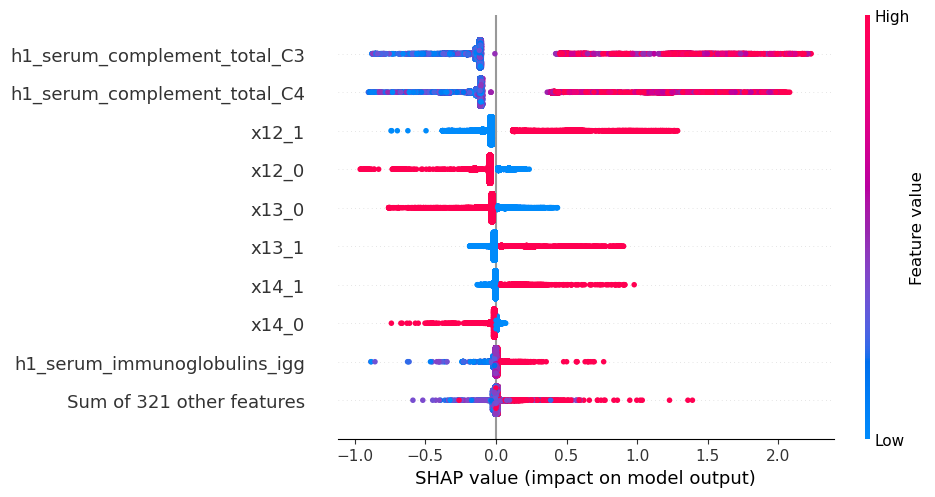

In [35]:
import shap

# Compute and plot the shapley values of the xgboost model on a beeswarm plot
#------YOUR CODE HERE--------
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgbRF)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

# summarize the effects of all the features
shap.plots.beeswarm(shap_values)
#------YOUR CODE ENDS--------

(h)

In [176]:
# Split the test set into cohorts in three different ways
# Remember to split both the input features and the ground truth labels!
#------YOUR CODE HERE--------
X_test_white = X_test_raw[X_test_raw['ethnicity'] == 'Caucasian']
X_test_non_white = X_test_raw[X_test_raw['ethnicity'] != 'Caucasian']
y_test_white = y_test.loc[X_test_white.index]
y_test_non_white = y_test.loc[X_test_non_white.index]

X_test_female = X_test_raw[X_test_raw['gender'] == '1']
X_test_male = X_test_raw[X_test_raw['gender'] == '0']
y_test_female = y_test.loc[X_test_female.index]
y_test_male = y_test.loc[X_test_male.index]

X_test_young = X_test_raw[X_test_raw['age'] < 65]
X_test_old = X_test_raw[X_test_raw['age'] >= 65]
y_test_young = y_test.loc[X_test_young.index]
y_test_old = y_test.loc[X_test_old.index]


# apply preprocessing pipeline to test set
X_test_white = pd.DataFrame(preprocessing_pipeline.transform(X_test_white), columns=feature_names)
X_test_non_white = pd.DataFrame(preprocessing_pipeline.transform(X_test_non_white), columns=feature_names)
X_test_female = pd.DataFrame(preprocessing_pipeline.transform(X_test_female), columns=feature_names)
X_test_male = pd.DataFrame(preprocessing_pipeline.transform(X_test_male), columns=feature_names)
X_test_young = pd.DataFrame(preprocessing_pipeline.transform(X_test_young), columns=feature_names)
X_test_old = pd.DataFrame(preprocessing_pipeline.transform(X_test_old), columns=feature_names)
#------YOUR CODE ENDS--------

(i) 

In [215]:
# Compute the performance metrics below
# You may use the evaluate_model function from before
#------YOUR CODE HERE--------
cohorts = [(X_test_white, y_test_white),
            (X_test_non_white, y_test_non_white),
            (X_test_female, y_test_female),
            (X_test_male, y_test_male),
            (X_test_young, y_test_young),
            (X_test_old, y_test_old)]

eval_cohort_l = []
for X_cohort, y_cohort in cohorts:
    eval_cohort = evaluate_model(xgbRF, X_test = X_cohort, y_test = y_cohort, printout=False)
    eval_cohort_l.append(eval_cohort)
    #print('---------------------------------------------------')
#------YOUR CODE ENDS--------

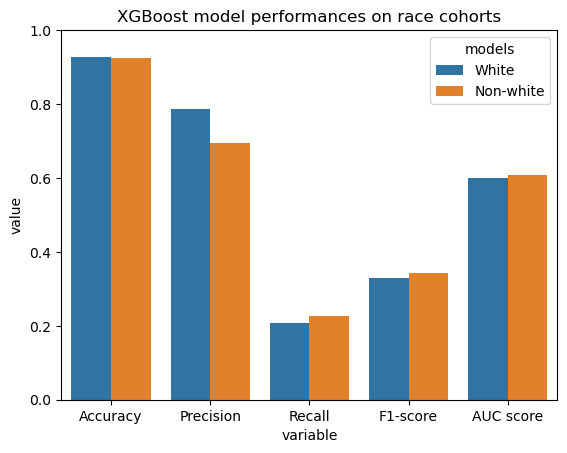

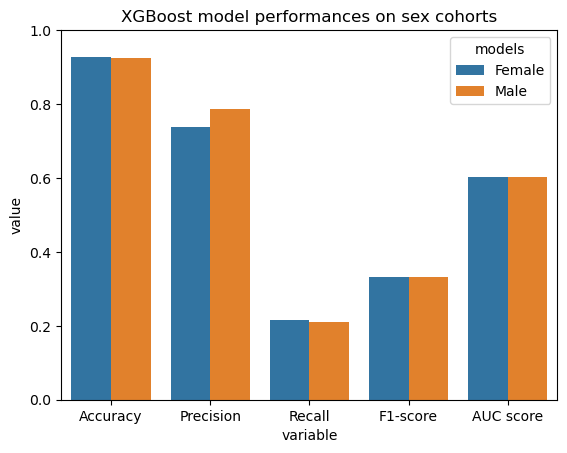

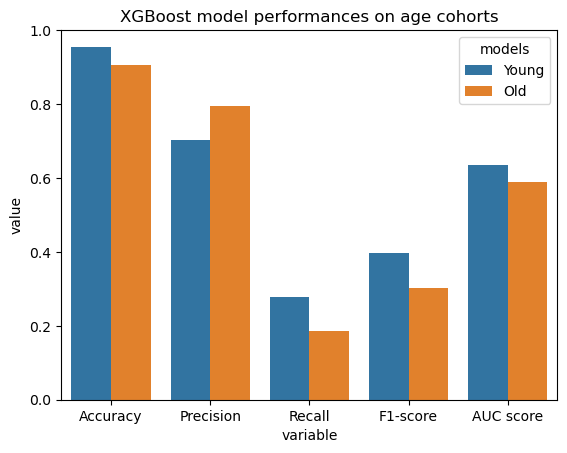

In [227]:
# Plot the performance metrics on a histogram for each of the cohort splits
#------YOUR CODE HERE--------
plt.ylim(0.0, 1.0)
models = ["White", "Non-white"]
n_models = 2
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
train_hist = pd.concat([eval_cohort_l[0]['Test'], eval_cohort_l[1]['Test']],axis=1)
models_rep =[e for model in zip(*[models]*5) for e in model]
d = train_hist.melt()
d['models'] = models_rep
d['variable'] = metrics * n_models
plt.title("XGBoost model performances on race cohorts")
sns.barplot(y='value',x='variable',hue='models',data=d)
plt.show()

plt.ylim(0.0, 1.0)
models = ["Female", "Male"]
n_models = 2
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
train_hist = pd.concat([eval_cohort_l[2]['Test'], eval_cohort_l[3]['Test']],axis=1)
models_rep =[e for model in zip(*[models]*5) for e in model]
d = train_hist.melt()
d['models'] = models_rep
d['variable'] = metrics * n_models
plt.title("XGBoost model performances on sex cohorts")
sns.barplot(y='value',x='variable',hue='models',data=d)
plt.show()

plt.ylim(0.0, 1.0)
models = ["Young", "Old"]
n_models = 2
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
train_hist = pd.concat([eval_cohort_l[4]['Test'], eval_cohort_l[5]['Test']],axis=1)
models_rep =[e for model in zip(*[models]*5) for e in model]
d = train_hist.melt()
d['models'] = models_rep
d['variable'] = metrics * n_models
plt.title("XGBoost model performances on age cohorts")
sns.barplot(y='value',x='variable',hue='models',data=d)
plt.show()
#------YOUR CODE ENDS--------

In [223]:
d

,variable,value,models
0,Test,0.926536,Xgboost
1,Test,0.785714,Xgboost
2,Test,0.207718,Xgboost
3,Test,0.328571,Xgboost
4,Test,0.601175,Xgboost
5,Test,0.924555,Xgboost
6,Test,0.694215,Xgboost
7,Test,0.227642,Xgboost
8,Test,0.342857,Xgboost
9,Test,0.609076,Xgboost


(j) Answer this question in your report

(k)

In [ ]:
# Visualize the shapley values for the prediction of the first datapoint of each half
# of each split using a waterfall plot
#------YOUR CODE HERE--------

#------YOUR CODE ENDS--------

(l) Answer this question in your report

## Problem 2. Delving into Disparities 

(a) 

In [ ]:
# Split the training set into cohorts the same way you split the test set before
#------YOUR CODE HERE--------

#------YOUR CODE ENDS--------

In [ ]:
# Plot the distributions, each on a different pie chart
#------YOUR CODE HERE--------

#------YOUR CODE ENDS--------

(b) 

In [ ]:
def drop_rows_criteria(df: pd.DataFrame,
                       outcome: pd.DataFrame,
                       pct_drop: float) -> pd.DataFrame:
    """
    Return two new versions of a dataset and the corresponding outcome
    without some rows based on a certain criteria
    (to change in the code of this function)

    Args:
        df (pd.DataFrame): initial dataset, pandas DataFrame format
        outcome (pd.DataFrame): outcome dataset, pandas DataFrame format
        pct_drop (float): percentage of chance to drop a value
            if a certain criteria is met

    Returns:
        pd.DataFrame: modified dataset
        pd.DataFrame: modified outcome
    
    Example:
        X_train_raw2, y_train2 = drop_rows_criteria(X_train_raw, y_train)
    """
    df2 = df.copy(deep=True).reset_index(drop=True)  # work on a copy of the dataframe
    outcome2 = outcome.copy(deep=True).reset_index(drop=True)
    indices_to_drop = []

    # Local rng for better reproducibility
    rng = np.random.default_rng(seed=42)
    for i in range(len(df2)):
        if df2.iat[i, df2.columns.get_loc("gender")] != "M":

            if rng.random() < pct_drop:  # pct_drop chance to drop this row
                indices_to_drop.append(i)
    df2.drop(indices_to_drop, axis=0, inplace=True)
    outcome2.drop(indices_to_drop, axis=0, inplace=True)
    return df2, outcome2

In [ ]:
from tqdm import tqdm

report = {}
percentages = [0.2, 0.4, 0.6, 0.8]
for pct in tqdm(percentages):

    # Use drop_rows_criteria to drop pct% of the training data
    #------YOUR CODE HERE--------
    X_train_raw2, y_train2 = 
    #------YOUR CODE ENDS--------
    
    # Create a fresh preprocessing pipeline
    preprocessing_pipeline2 = Pipeline(
        steps=[("preprocessing", preprocessing)]
    )


    # Fit the preprocessing pipeline to the new training set and store the
    # normalized version of that set in X_train2
    # (Question to think about: why should we do this?)
    #------YOUR CODE HERE--------
    X_train2 = 
    #------YOUR CODE ENDS--------

    # Extract new feature names
    features_names = list(preprocessing_pipeline2[0].transformers_[0][2]) + list(preprocessing_pipeline2[0].transformers_[1][1].get_feature_names_out())
    X_train2 = pd.DataFrame(X_train2, columns=features_names)  # to dataframe type
    X_test2 = pd.DataFrame(preprocessing_pipeline2.transform(X_test_raw), columns=features_names)

    # Split the new test data (X_test2) into male and female cohorts
    #------YOUR CODE HERE--------
    

    #------YOUR CODE ENDS--------

    # Create, fit, and evaluate your model
    # You may use evaluate_model from before
    #------YOUR CODE HERE--------
    
    
    #------YOUR CODE ENDS--------